In [1]:
import us

In [2]:
import pandas as pd

users = pd.read_csv('USER_TAKEHOME.csv') 
users

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female
...,...,...,...,...,...,...
99995,61fc06d41febf771966da8fa,2022-02-03 16:46:12.000 Z,1992-03-16 08:00:00.000 Z,CA,en,female
99996,6391e7ef90ad5449ec5f782d,2022-12-08 13:34:39.000 Z,1993-09-23 05:00:00.000 Z,MO,en,female
99997,637d5efdd6f2a49c49934dcb,2022-11-22 23:45:05.000 Z,1983-04-19 00:00:00.000 Z,RI,en,female
99998,5f0de23b05d8a6147dc0cafa,2020-07-14 16:50:04.000 Z,1995-06-09 04:00:00.000 Z,DE,en,female


# Users EDA

#### Column names: 'ID', 'CREATED_DATE', 'BIRTH_DATE', 'STATE', 'LANGUAGE', 'GENDER'

**ID**: Zero NULL values, 100000 unique values, ID values are all Unique

**CREATED DATE**:
Has zero NULL values, 99942 unique values. Accounts starting from 2014-04-18 to 2024-09-11. Most account creation in 2022, 2023 and 2021 in that order.

**BIRTH DATE**:
3675 NULL values, 54721 unique values.
Birth dates starting from 1900-01-01 to 2022-04-03. Most frequent birth dates between 1980-2005

**STATE**: 4812 NULL Records, Total Unique 52 records - 50 US States, Nan, DC(US territory). Most User state is TX and least user state is VT. Top 5 states i.e., TX, FL, CA, NY, IL - makes up 37.85% of the users.

**LANGUAGE**: 30508 NULL records i.e., 30.50% NULL records. Total Unique 2 records - Eng and es-419. 91.2% eng speakers and 8.7% Spanish speakers

**GENDER**:5892 NULL Records. 7 unique records - female, male, non_binary, transgender, prefer_not_to_say, unknown, not_listed. Most frequent gender is female with 68.39% and least frequent is not_listed with 0.029%.

In [253]:
users.isna().sum()/users.shape[0]*100


ID               0.000
CREATED_DATE     0.000
BIRTH_DATE       3.675
STATE            4.812
LANGUAGE        30.508
GENDER           6.078
dtype: float64

In [3]:
users.columns

Index(['ID', 'CREATED_DATE', 'BIRTH_DATE', 'STATE', 'LANGUAGE', 'GENDER'], dtype='object')

In [4]:
users.ID.nunique()

100000

In [5]:
users.ID.isna().sum()

0

In [30]:
users.CREATED_DATE.nunique()

99942

In [6]:
users.CREATED_DATE.isna().sum()

0

In [7]:
users.CREATED_DATE.max()

'2024-09-11 17:59:15.000 Z'

In [8]:
users.CREATED_DATE.min()

'2014-04-18 23:14:55.000 Z'

In [32]:
users.BIRTH_DATE.isna().sum()

3675

In [31]:
users.BIRTH_DATE.nunique()

54721

In [33]:
users.BIRTH_DATE.max()

Timestamp('2022-04-03 07:00:00+0000', tz='UTC')

In [34]:
users.BIRTH_DATE.min()

Timestamp('1900-01-01 00:00:00+0000', tz='UTC')

In [41]:
import matplotlib.pyplot as plt


In [42]:
users['BIRTH_DATE'] = pd.to_datetime(users['BIRTH_DATE'])
users['CREATED_DATE'] = pd.to_datetime(users['CREATED_DATE'])

In [43]:
date_series = pd.Series(users.CREATED_DATE)

In [44]:
date_series

0       2020-06-24 20:17:54+00:00
1       2021-01-03 19:53:55+00:00
2       2023-05-31 18:42:18+00:00
3       2023-12-26 01:46:22+00:00
4       2023-10-28 11:51:50+00:00
                   ...           
99995   2022-02-03 16:46:12+00:00
99996   2022-12-08 13:34:39+00:00
99997   2022-11-22 23:45:05+00:00
99998   2020-07-14 16:50:04+00:00
99999   2020-03-25 01:30:30+00:00
Name: CREATED_DATE, Length: 100000, dtype: datetime64[ns, UTC]

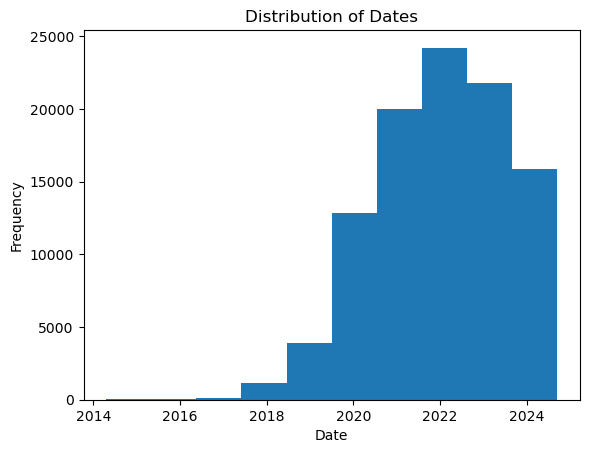

In [45]:
plt.hist(date_series, bins=10)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Dates')
plt.show()

In [49]:
date_birth = pd.Series(users.BIRTH_DATE.dropna())

In [50]:
date_birth

0       2000-08-11 00:00:00+00:00
1       2001-09-24 04:00:00+00:00
2       1994-10-28 00:00:00+00:00
4       1972-03-19 00:00:00+00:00
5       1999-10-27 04:00:00+00:00
                   ...           
99995   1992-03-16 08:00:00+00:00
99996   1993-09-23 05:00:00+00:00
99997   1983-04-19 00:00:00+00:00
99998   1995-06-09 04:00:00+00:00
99999   1995-12-15 05:00:00+00:00
Name: BIRTH_DATE, Length: 96325, dtype: datetime64[ns, UTC]

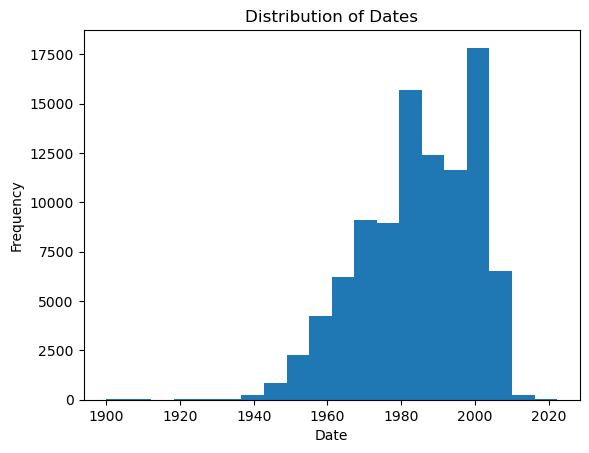

In [58]:
plt.hist(date_birth, bins=20)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Dates')
plt.show()

In [20]:
users.CREATED_DATE

0        2020-06-24 20:17:54.000 Z
1        2021-01-03 19:53:55.000 Z
2        2023-05-31 18:42:18.000 Z
3        2023-12-26 01:46:22.000 Z
4        2023-10-28 11:51:50.000 Z
                   ...            
99995    2022-02-03 16:46:12.000 Z
99996    2022-12-08 13:34:39.000 Z
99997    2022-11-22 23:45:05.000 Z
99998    2020-07-14 16:50:04.000 Z
99999    2020-03-25 01:30:30.000 Z
Name: CREATED_DATE, Length: 100000, dtype: object

In [17]:
users.CREATED_DATE.value_counts()

CREATED_DATE
2023-01-12 18:30:15.000 Z    2
2019-08-28 02:21:44.000 Z    2
2024-04-11 02:56:41.000 Z    2
2024-03-11 17:03:02.000 Z    2
2024-02-25 20:43:59.000 Z    2
                            ..
2024-08-25 03:30:41.000 Z    1
2021-03-12 13:08:04.000 Z    1
2024-07-24 19:33:12.000 Z    1
2020-12-01 05:25:08.000 Z    1
2020-03-25 01:30:30.000 Z    1
Name: count, Length: 99942, dtype: int64

In [20]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [21]:
users.value_counts()

ID                        CREATED_DATE               BIRTH_DATE                 STATE  LANGUAGE  GENDER
53f14a5de4b04398e8bc1397  2014-08-18 00:35:41.000 Z  1983-05-08 00:00:00.000 Z  WI     en        female    1
63c9de3b39c79dcbdd5daf49  2023-01-20 00:20:11.000 Z  1971-08-16 00:00:00.000 Z  FL     en        female    1
63c9aa633d310dceeacd55ac  2023-01-19 20:38:59.000 Z  1956-10-26 00:00:00.000 Z  CO     en        female    1
63c9af0039c79dcbdd5d7b9d  2023-01-19 20:58:40.000 Z  1983-01-19 05:00:00.000 Z  NJ     es-419    female    1
63c9af0c3d310dceeacd5aa2  2023-01-19 20:58:52.000 Z  2000-08-23 00:00:00.000 Z  NV     en        male      1
                                                                                                          ..
621b62dfb715a675fffe5942  2022-02-27 11:39:11.000 Z  1982-03-23 05:00:00.000 Z  FL     en        female    1
621b82467224483dcf3aefe6  2022-02-27 13:53:10.000 Z  1972-06-11 00:00:00.000 Z  TN     en        male      1
621b941a3fef641a6a882f4e

In [59]:
users.nunique()

ID              100000
CREATED_DATE     99942
BIRTH_DATE       54721
STATE               52
LANGUAGE             2
GENDER              11
dtype: int64

In [83]:
user_states = users.STATE.unique()

In [91]:
user_states

array(['CA', 'PA', 'FL', 'NC', 'NY', 'IN', nan, 'OH', 'TX', 'NM', 'PR',
       'CO', 'AZ', 'RI', 'MO', 'NJ', 'MA', 'TN', 'LA', 'NH', 'WI', 'IA',
       'GA', 'VA', 'DC', 'KY', 'SC', 'MN', 'WV', 'DE', 'MI', 'IL', 'MS',
       'WA', 'KS', 'CT', 'OR', 'UT', 'MD', 'OK', 'NE', 'NV', 'AL', 'AK',
       'AR', 'HI', 'ME', 'ND', 'ID', 'WY', 'MT', 'SD', 'VT'], dtype=object)

In [63]:
users.STATE.isna().sum()

4812

In [121]:
 for i in user_states:
     if not pd.isna(i):
         print(bool(us.states.lookup(i)),i)
         # if bool(us.states.lookup(i))=='True':
             # print(bool(us.states.lookup(i)))
         #     # print(type(i),i)
         #     print('8')
         # else:
         #     print("GOTTTT IT",i)
    

True CA
True PA
True FL
True NC
True NY
True IN
True OH
True TX
True NM
True PR
True CO
True AZ
True RI
True MO
True NJ
True MA
True TN
True LA
True NH
True WI
True IA
True GA
True VA
False DC
True KY
True SC
True MN
True WV
True DE
True MI
True IL
True MS
True WA
True KS
True CT
True OR
True UT
True MD
True OK
True NE
True NV
True AL
True AK
True AR
True HI
True ME
True ND
True ID
True WY
True MT
True SD
True VT


In [60]:
users.STATE.value_counts()

STATE
TX    9028
FL    8921
CA    8589
NY    5703
IL    3794
GA    3718
PA    3644
OH    3519
NC    3399
NJ    2899
MI    2582
VA    2400
IN    2213
TN    2165
AL    1792
SC    1773
KY    1731
AZ    1728
MO    1652
MD    1636
MA    1523
WI    1389
PR    1361
LA    1290
WA    1234
CO    1139
MN    1125
CT    1110
OK    1100
AR    1011
MS     960
IA     933
NV     837
KS     835
OR     700
WV     674
UT     593
DE     492
NE     487
NM     452
ME     368
NH     359
HI     350
ID     350
AK     297
RI     284
DC     241
SD     205
ND     185
MT     169
WY     138
VT     111
Name: count, dtype: int64

In [88]:
users.STATE.value_counts().head().sum()/users.STATE.notna().sum()*100

37.85666260452999

In [84]:
users.STATE.value_counts()/users.STATE.notna().sum()*100

STATE
TX    9.484389
FL    9.371980
CA    9.023196
NY    5.991301
IL    3.985797
GA    3.905955
PA    3.828214
OH    3.696895
NC    3.570828
NJ    3.045552
MI    2.712527
VA    2.521326
IN    2.324873
TN    2.274446
AL    1.882590
SC    1.862630
KY    1.818507
AZ    1.815355
MO    1.735513
MD    1.718704
MA    1.599992
WI    1.459218
PR    1.429802
LA    1.355213
WA    1.296382
CO    1.196579
MN    1.181872
CT    1.166113
OK    1.155608
AR    1.062109
MS    1.008530
IA    0.980166
NV    0.879313
KS    0.877211
OR    0.735387
WV    0.708072
UT    0.622978
DE    0.516872
NE    0.511619
NM    0.474850
ME    0.386603
NH    0.377148
HI    0.367693
ID    0.367693
AK    0.312014
RI    0.298357
DC    0.253183
SD    0.215363
ND    0.194352
MT    0.177543
WY    0.144976
VT    0.116611
Name: count, dtype: float64

In [119]:
#data frequency
users.describe()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
count,100000,100000,96325,95188,69492,94108
unique,100000,99942,54721,52,2,11
top,5ef3b4f17053ab141787697d,2023-01-12 18:30:15.000 Z,1970-01-01 00:00:00.000 Z,TX,en,female
freq,1,2,1272,9028,63403,64240


In [23]:
users.LANGUAGE.value_counts()

LANGUAGE
en        63403
es-419     6089
Name: count, dtype: int64

In [73]:
users.LANGUAGE.value_counts()/users.LANGUAGE.notna().sum()

LANGUAGE
en        0.912378
es-419    0.087622
Name: count, dtype: float64

In [24]:
#total null count in each row
users.isnull().sum()

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

In [66]:
users.isna().sum()

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

In [74]:
users.GENDER.value_counts()

GENDER
female                    64240
male                      25829
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: count, dtype: int64

In [76]:
users.GENDER.value_counts()/users.GENDER.notna().sum()*100

GENDER
female                    68.261997
male                      27.446126
transgender                1.882943
prefer_not_to_say          1.434522
non_binary                 0.502614
unknown                    0.208271
not_listed                 0.191270
Non-Binary                 0.036129
not_specified              0.029753
My gender isn't listed     0.005313
Prefer not to say          0.001063
Name: count, dtype: float64

In [79]:
#gender mapping
gender_mapping = {
    "female": "female",
    "male": "male",
    "transgender": "transgender",
    "prefer_not_to_say": "prefer_not_to_say",
    "non_binary": "non_binary",
    "unknown": "unknown",
    "not_listed ": "not_listed ",
    "Non-Binary" : "non_binary",
    "not_specified" :"prefer_not_to_say",
    "My gender isn't listed":"not_listed",
    "Prefer not to say":"prefer_not_to_say"
}

In [80]:
users["GENDER"] = users["GENDER"].map(gender_mapping)


In [82]:
users.GENDER.value_counts()


GENDER
female               64240
male                 25829
transgender           1772
prefer_not_to_say     1350
non_binary             507
unknown                196
not_listed              28
Name: count, dtype: int64

In [83]:
users.GENDER.unique()


array(['female', nan, 'male', 'non_binary', 'transgender',
       'prefer_not_to_say', 'unknown', 'not_listed'], dtype=object)

In [81]:
users.GENDER.value_counts()/users.GENDER.notna().sum()*100

GENDER
female               68.397181
male                 27.500479
transgender           1.886672
prefer_not_to_say     1.437363
non_binary            0.539810
unknown               0.208684
not_listed            0.029812
Name: count, dtype: float64

# Products EDA

#### Columns:  'CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER', 'BRAND', 'BARCODE'

**CATEGORY_1**  - 27 unique categories (including NaN). NULL values : 0.013%. Health & Wellness makes up 60.64% of the entries and Snacks makes up 38.41% of the entries. 99% of the entries are "Health & Wellness" and "Snacks". 

**CATEGORY_2**  - 121 unique categories (including NaN). NULL values : 0.16%. Top 5 make up 56.35% of the NON NULL categories and top 10 categories make up 72.36% of the NON NULL values. 

**CATEGORY_3**  - 344 unique categories (including NaN). NULL values : 7.16%. Top 5 categories: Confection Candy, Vitamins & Herbal Supplements, Chocolate Candy, Hair Styling Products, Reading Glasses.

**CATEGORY_4**  - 127 unique categories (including NaN). NULL values : 92.02%. top 10 categories make up 64% of the NON NULL values.

**MANUFACTURER**  - 4354 unique manufacturesrs (including NaN). NULL values : 26.78%. 

**BRAND**  - 8122 unique brands (including NaN) NULL values : 26.78%

**BARCODE**  - NULL values : 0.47%. 841342 unique barcodes

In [97]:
products = pd.read_csv('PRODUCTS_TAKEHOME.csv') 
products

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
...,...,...,...,...,...,...,...
845547,Health & Wellness,Topical Muscle & Joint Relief Treatments,Braces & Wraps,NaN,NaN,NaN,7.223016e+11
845548,Snacks,Cookies,NaN,NaN,"TREEHOUSE FOODS, INC.",LOFTHOUSE,4.182082e+10
845549,Snacks,Candy,Confection Candy,NaN,HARIBO GMBH & CO KG,HARIBO,1.001672e+11
845550,Snacks,Nuts & Seeds,Hazelnuts,NaN,DOUBLE-COLA CO,JUMBO,7.539076e+10


In [91]:
products.CATEGORY_4.value_counts()

CATEGORY_4
Lip Balms                      9737
Already Popped Popcorn         6974
Sleep Aids                     4978
Hair Brushes & Combs           4724
Women's Shaving Gel & Cream    3874
                               ... 
Sherbet                           1
Coconut Milk                      1
Corn Syrup                        1
White Merlot                      1
Spices                            1
Name: count, Length: 127, dtype: int64

In [92]:
products.columns

Index(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER',
       'BRAND', 'BARCODE'],
      dtype='object')

In [96]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [99]:
products.isna().sum()/products.shape[0]*100


CATEGORY_1       0.013128
CATEGORY_2       0.168411
CATEGORY_3       7.162895
CATEGORY_4      92.021898
MANUFACTURER    26.784160
BRAND           26.783923
BARCODE          0.476020
dtype: float64

In [98]:
products.shape[0]

845552

In [119]:
products.CATEGORY_1.nunique()


27

In [120]:
products.CATEGORY_2.nunique()


121

In [100]:
products.CATEGORY_1.unique()


array(['Health & Wellness', 'Snacks', 'Beverages', 'Pantry', 'Alcohol',
       'Apparel & Accessories', 'Restaurant', 'Needs Review', 'Dairy',
       'Home & Garden', nan, 'Household Supplies', 'Meat & Seafood',
       'Deli & Bakery', 'Sporting Goods', 'Produce', 'Office & School',
       'Frozen', 'Arts & Entertainment', 'Animals & Pet Supplies',
       'Electronics', 'Beauty', 'Toys & Games', 'Mature',
       'Vehicles & Parts', 'Baby & Toddler', 'Luggage & Bags', 'Media'],
      dtype=object)

In [104]:
products.CATEGORY_1.value_counts()


CATEGORY_1
Health & Wellness         512695
Snacks                    324817
Beverages                   3990
Pantry                       871
Apparel & Accessories        846
Dairy                        602
Needs Review                 547
Alcohol                      503
Home & Garden                115
Restaurant                    69
Deli & Bakery                 69
Frozen                        62
Meat & Seafood                49
Sporting Goods                47
Office & School               45
Toys & Games                  28
Household Supplies            24
Produce                       20
Animals & Pet Supplies        16
Arts & Entertainment           7
Electronics                    5
Mature                         3
Vehicles & Parts               3
Baby & Toddler                 3
Beauty                         2
Media                          2
Luggage & Bags                 1
Name: count, dtype: int64

In [105]:
products.CATEGORY_1.value_counts()/products.CATEGORY_1.notna().sum()*100


CATEGORY_1
Health & Wellness         60.642316
Snacks                    38.419831
Beverages                  0.471943
Pantry                     0.103023
Apparel & Accessories      0.100066
Dairy                      0.071205
Needs Review               0.064700
Alcohol                    0.059496
Home & Garden              0.013602
Restaurant                 0.008161
Deli & Bakery              0.008161
Frozen                     0.007333
Meat & Seafood             0.005796
Sporting Goods             0.005559
Office & School            0.005323
Toys & Games               0.003312
Household Supplies         0.002839
Produce                    0.002366
Animals & Pet Supplies     0.001893
Arts & Entertainment       0.000828
Electronics                0.000591
Mature                     0.000355
Vehicles & Parts           0.000355
Baby & Toddler             0.000355
Beauty                     0.000237
Media                      0.000237
Luggage & Bags             0.000118
Name: count, dtyp

In [106]:
60.642316+38.419831

99.06214700000001

In [101]:
products.CATEGORY_2.unique()


array(['Sexual Health', 'Puffed Snacks', 'Hair Care', 'Oral Care',
       'Medicines & Treatments', 'Deodorant & Antiperspirant',
       'Snack Bars', nan, 'Bath & Body', 'Nuts & Seeds', 'Candy',
       'Cookies', 'Variety Snack Packs', 'Hair Removal',
       'Medical Supplies & Equipment', 'Chips', 'Snack Cakes',
       'Skin Care', 'Dessert Toppings', 'Eye Care',
       'Fruit & Vegetable Snacks', 'Snack Mixes', 'Crackers',
       'Jerky & Dried Meat', 'Topical Muscle & Joint Relief Treatments',
       'Foot Care', 'First Aid', 'Ear Care', 'Menstrual Care', 'Pretzels',
       'Trail Mix', 'Dips & Salsa', 'Adult Incontinence', 'Water',
       'Cereal, Granola, & Toaster Pastries', 'Wine', 'Pudding & Gelatin',
       'Clothing', 'Carbonated Soft Drinks', 'Energy & Endurance',
       'Beverages', 'Cheese', 'Kitchen & Dining', 'Energy Drinks',
       'Packaged Vegetables', 'Household Cleaning Supplies',
       'Business & Home Security',
       'Hard Seltzers, Sodas, Waters, Lemonades & 

In [107]:
products.CATEGORY_2.value_counts()


CATEGORY_2
Candy                      121036
Hair Care                  111482
Medicines & Treatments      99118
Bath & Body                 81469
Skin Care                   62587
                            ...  
Games                           1
Vehicle Storage & Cargo         1
Audio                           1
Pasta & Noodles                 1
Baby Transport                  1
Name: count, Length: 121, dtype: int64

In [108]:
products.CATEGORY_2.value_counts()/products.CATEGORY_2.notna().sum()*100


CATEGORY_2
Candy                      14.338584
Hair Care                  13.206765
Medicines & Treatments     11.742058
Bath & Body                 9.651261
Skin Care                   7.414397
                             ...    
Games                       0.000118
Vehicle Storage & Cargo     0.000118
Audio                       0.000118
Pasta & Noodles             0.000118
Baby Transport              0.000118
Name: count, Length: 121, dtype: float64

In [114]:
14.338584+13.206765+11.742058+9.651261+7.414397

56.353065

In [112]:
products.CATEGORY_2.value_counts().head(10).sum()/products.CATEGORY_2.notna().sum()*100

72.36947477159862

In [113]:
products.CATEGORY_2.value_counts().head(5).sum()/products.CATEGORY_2.notna().sum()*100

56.35306493801888

In [102]:
products.CATEGORY_3.unique()


array(['Conductivity Gels & Lotions', 'Cheese Curls & Puffs',
       'Hair Care Accessories', 'Toothpaste', 'Essential Oils',
       'Vitamins & Herbal Supplements',
       "Men's Deodorant & Antiperspirant", 'Granola Bars', nan,
       'Skin Treatments', 'Hand & Body Lotions', 'Hazelnuts',
       'Shower Caps', 'Hair Tools', 'Candy Variety Pack',
       'Chocolate Candy', 'Oral Care Accessories', 'Hand Sanitizer Wipes',
       'Shaving Gel & Cream', 'Crisps', 'Pies & Tarts Snack Cakes',
       'Skin Care Masks & Peels', 'Lip Balms & Treatments',
       'Anti-Aging Skin Care Kits', 'Shampoo',
       'Ice Cream Sauces & Syrups', 'Reading Glasses', 'Popcorn',
       'Dried Fruit', 'Sunscreen', 'Hair Styling Products', 'Almonds',
       'Facial Cleansers', 'Confection Candy', 'Wheat Crackers',
       'Hand Sanitizer', 'Potato Chips', 'Performance & Protein Bars',
       'Jerky & Bites', 'Facial Pore Strips', 'Braces & Wraps',
       'Body Wash', 'Body Powder', 'Bath & Body Gift Sets', 'Ch

In [118]:
products.CATEGORY_3.nunique()


344

In [117]:
products.CATEGORY_3.value_counts()/products.CATEGORY_3.notna().sum()*100


CATEGORY_3
Confection Candy                 7.256817
Vitamins & Herbal Supplements    7.095668
Chocolate Candy                  6.077815
Hair Styling Products            2.605142
Reading Glasses                  2.598008
                                   ...   
Fuel Containers & Tanks          0.000127
Beans                            0.000127
Dry Pasta                        0.000127
Chair & Sofa Cushions            0.000127
Baby Carriers                    0.000127
Name: count, Length: 344, dtype: float64

In [121]:
products.CATEGORY_3.value_counts().head()

CATEGORY_3
Confection Candy                 56965
Vitamins & Herbal Supplements    55700
Chocolate Candy                  47710
Hair Styling Products            20450
Reading Glasses                  20394
Name: count, dtype: int64

In [103]:
products.CATEGORY_4.unique()


array([nan, 'Hair Brushes & Combs', "Women's Shaving Gel & Cream",
       'Lip Balms', 'Already Popped Popcorn', "Men's Razors",
       'Snoring Aids', 'Popcorn Kernels & Popcorn Seasonings',
       'Sleep Aids', 'Hair Straighteners', 'Medicated Lip Treatments',
       'Nausea & Motion Sickness Medicines & Treatments',
       "Women's Razors", 'Flavored Sparkling Water', 'Immune Support',
       'Constipation Relief Medicines & Treatments',
       'Cold & Flu Medicines & Treatments',
       'Anti Diarrheal Medicines & Treatments', 'Cough Drops & Lozenges',
       'Water Pills', 'Microwave Popcorn',
       'Cough & Chest Congestion Medicines & Treatments',
       'Heartburn & Antacids Medicines & Treatments', 'Regular Cola',
       'Diet Cola', 'Sore Throat Medicines & Treatments',
       'Gas Relief Medicines & Treatments', 'Diet Soda', 'Vapors & Rubs',
       "Men's Shaving Gel & Cream", 'Skin Toners',
       'Lactose Intolerance Medicines & Treatments', 'Water Bottles',
       'Unfla

In [122]:
products.CATEGORY_4.nunique()


127

In [129]:
products.CATEGORY_4.value_counts().head(10).sum()/products.CATEGORY_4.notna().sum()*100


64.6570509494656

In [135]:
products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [134]:
products.columns

Index(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER',
       'BRAND', 'BARCODE'],
      dtype='object')

In [139]:
products.MANUFACTURER.nunique()

4354

In [141]:
products.MANUFACTURER.value_counts()/products.MANUFACTURER.notna().sum()*100

MANUFACTURER
PLACEHOLDER MANUFACTURER             14.037326
PROCTER & GAMBLE                      3.402641
REM MANUFACTURER                      3.361935
UNILEVER                              2.724051
L'OREAL                               2.697398
                                       ...    
INNO FOODS, INC.                      0.000162
FLOWERWOOD NURSERY, INC.              0.000162
PROGRESSIVE INTERNATIONAL CORP.       0.000162
LEVINSOHN TEXTILE COMPANY             0.000162
OUTDOOR PRODUCT INNOVATIONS, INC.     0.000162
Name: count, Length: 4354, dtype: float64

In [142]:
products.BRAND.nunique()

8122

In [143]:
products.BRAND.value_counts()/products.BRAND.notna().sum()*100

BRAND
REM BRAND          3.361924
BRAND NOT KNOWN    2.750048
PRIVATE LABEL      2.175325
CVS                1.033792
SEGO               0.780351
                     ...   
ALAGA              0.000162
A PINATA 4 U       0.000162
SQWINCHER          0.000162
MOSISO             0.000162
GATEWAY            0.000162
Name: count, Length: 8122, dtype: float64

In [145]:
products.BARCODE.unique()

array([7.96494408e+11, 2.32780110e+10, 4.61817824e+11, ...,
       1.00167155e+11, 7.53907560e+10, 7.96793338e+11])

In [152]:
products.BARCODE.isna().sum()

4025

In [144]:
products.BARCODE.nunique()

841342

In [194]:
products.BARCODE.value_counts().head(185)

BARCODE
3423905.0     2
3416105.0     2
20146900.0    2
3454206.0     2
3462003.0     2
             ..
13468439.0    2
3465608.0     2
3424001.0     2
20012274.0    2
20259044.0    2
Name: count, Length: 185, dtype: int64

In [193]:
products.BARCODE.head()

0    7.964944e+11
1    2.327801e+10
2    4.618178e+11
3    3.500047e+10
4    8.068109e+11
Name: BARCODE, dtype: float64

In [ ]:
products.BARCODE.value_counts()/products.BARCODE.notna().sum()*100

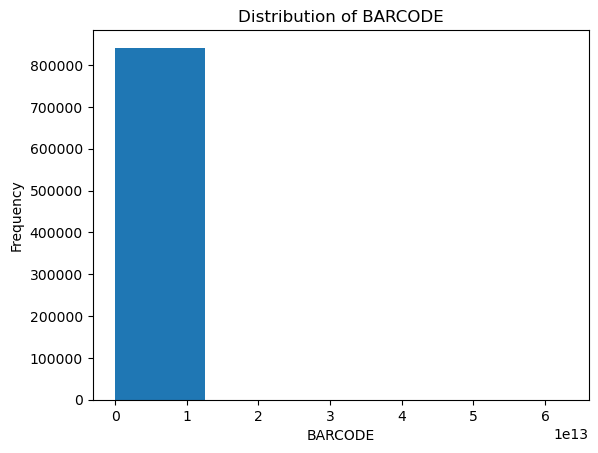

In [150]:
plt.hist(products.BARCODE, bins=5)
plt.xlabel('BARCODE')
plt.ylabel('Frequency')
plt.title('Distribution of BARCODE')
plt.show()

In [206]:
products["BARCODE"].astype(str).str.len().value_counts()

BARCODE
14    502091
13    296376
15     30144
12      7591
3       4025
10      1907
11      1762
9        950
8        570
7         83
16        44
6          8
5          1
Name: count, dtype: int64

In [210]:
products["BARCODE"].astype(str).str.len().value_counts()/3386233*100

BARCODE
14    14.827420
13     8.752381
15     0.890193
12     0.224172
3      0.118864
10     0.056316
11     0.052034
9      0.028055
8      0.016833
7      0.002451
16     0.001299
6      0.000236
5      0.000030
Name: count, dtype: float64

In [211]:
products["BARCODE"].astype(str).str.len().value_counts().head()/3386233*100

BARCODE
14    14.827420
13     8.752381
15     0.890193
12     0.224172
3      0.118864
Name: count, dtype: float64

In [207]:
products["BARCODE"].notna().astype(str).str.len().sum()

3386233

In [220]:
products["BARCODE"].astype(str).str.len()>13

0          True
1         False
2          True
3         False
4          True
          ...  
845547     True
845548    False
845549     True
845550    False
845551     True
Name: BARCODE, Length: 845552, dtype: bool

In [222]:
products["BARCODE"][products["BARCODE"].astype(str).str.len()>13]

0         7.964944e+11
2         4.618178e+11
4         8.068109e+11
5         6.626585e+11
6         6.177376e+11
              ...     
845542    8.844864e+11
845543    8.125120e+11
845547    7.223016e+11
845549    1.001672e+11
845551    7.967933e+11
Name: BARCODE, Length: 532279, dtype: float64

# Transactions EDA

In [270]:
transactions = pd.read_csv('TRANSACTION_TAKEHOME.csv') 
transactions

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.00,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.00,2.00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.00,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211 Z,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1.00,3.00


In [271]:
transactions.describe()

,BARCODE
count,4.423800e+04
mean,1.715863e+11
std,3.269219e+11
min,-1.000000e+00
25%,3.077212e+10
50%,5.210004e+10
75%,8.536765e+10
max,9.347108e+12


In [272]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [273]:
transactions.isna().sum()/transactions.shape[0]*100


RECEIPT_ID         0.000
PURCHASE_DATE      0.000
SCAN_DATE          0.000
STORE_NAME         0.000
USER_ID            0.000
BARCODE           11.524
FINAL_QUANTITY     0.000
FINAL_SALE         0.000
dtype: float64

In [274]:
transactions.RECEIPT_ID.isna().sum()

0

In [275]:
transactions.RECEIPT_ID.nunique()

24440

In [276]:
num_duplicates = transactions.duplicated(subset=['RECEIPT_ID']).sum()
num_duplicates

25560

In [277]:
25560+24440


50000

In [278]:
transactions.RECEIPT_ID.value_counts()

RECEIPT_ID
bedac253-2256-461b-96af-267748e6cecf    12
bc304cd7-8353-4142-ac7f-f3ccec720cb3     8
4ec870d2-c39f-4a40-bf8a-26a079409b20     8
2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711     8
760c98da-5174-401f-a203-b839c4d406be     8
                                        ..
56a368e6-d677-459d-ba05-70a886c3126b     2
56a0e14c-187c-43ec-96ab-b67ac5c197f1     2
569f4be9-63d1-4afd-8ed5-d520ce85b878     2
56946262-15b1-41fd-8814-fc544d35fc6c     2
fffe8012-7dcf-4d84-b6c6-feaacab5074a     2
Name: count, Length: 24440, dtype: int64

In [279]:
print(transactions.PURCHASE_DATE.nunique())
print(transactions.PURCHASE_DATE.isna().sum())
print(transactions.PURCHASE_DATE.min())
print(transactions.PURCHASE_DATE.max())


89
0
2024-06-12
2024-09-08


In [280]:
transactions['PURCHASE_DATE'] = pd.to_datetime(transactions['PURCHASE_DATE'])

In [281]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      50000 non-null  object        
 1   PURCHASE_DATE   50000 non-null  datetime64[ns]
 2   SCAN_DATE       50000 non-null  object        
 3   STORE_NAME      50000 non-null  object        
 4   USER_ID         50000 non-null  object        
 5   BARCODE         44238 non-null  float64       
 6   FINAL_QUANTITY  50000 non-null  object        
 7   FINAL_SALE      50000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 3.1+ MB


In [282]:
transactions['PURCHASE_DATE'].dt.month.value_counts()

PURCHASE_DATE
7    18576
8    17124
6    10854
9     3446
Name: count, dtype: int64

In [283]:
pdate_series = pd.Series(transactions.PURCHASE_DATE)

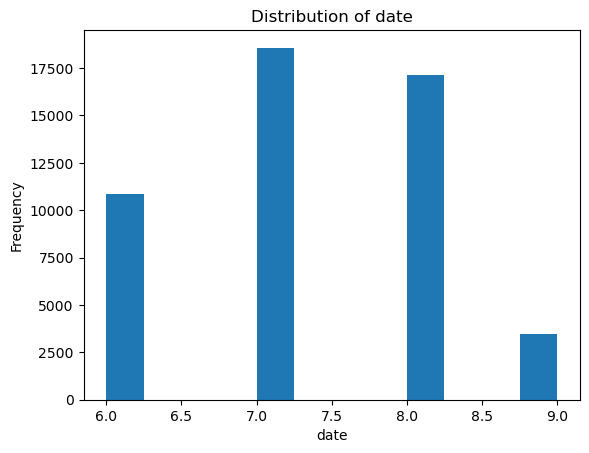

In [284]:
plt.hist(transactions['PURCHASE_DATE'].dt.month, bins=12)
plt.xlabel('date')
plt.ylabel('Frequency')
plt.title('Distribution of date')
plt.show()

In [285]:
print(transactions.SCAN_DATE.nunique())
print(transactions.SCAN_DATE.isna().sum())
print(transactions.SCAN_DATE.min())
print(transactions.SCAN_DATE.max())

24440
0
2024-06-12 06:36:34.910 Z
2024-09-08 23:07:19.836 Z


In [286]:
transactions.STORE_NAME.isna().sum()

0

In [287]:
transactions.STORE_NAME.nunique()

954

In [288]:
transactions.USER_ID.nunique()

17694

In [289]:
transactions.STORE_NAME.value_counts()/transactions.STORE_NAME.notna().sum()*100

STORE_NAME
WALMART                   42.652
DOLLAR GENERAL STORE       5.496
ALDI                       5.280
KROGER                     2.988
TARGET                     2.968
                           ...  
SPIRITS                    0.004
LA GLORIA SUPERMERCADO     0.004
FARM FRESH                 0.004
ALTA                       0.004
PLATEAU TRAVEL CENTER      0.004
Name: count, Length: 954, dtype: float64

In [290]:
transactions.BARCODE.nunique()

11027

In [291]:
barcode_duplicates = transactions.duplicated(subset=['BARCODE']).sum()
barcode_duplicates

38972

In [292]:
11027+38972

49999

In [293]:
transactions.BARCODE.value_counts()

BARCODE
7.874222e+10    182
5.111115e+11    168
5.111110e+11    164
7.874229e+10    158
3.111112e+11    150
               ... 
1.605611e+07      2
2.220094e+10      2
7.055220e+10      2
7.137333e+11      2
7.432310e+10      2
Name: count, Length: 11027, dtype: int64

In [294]:
transactions['FINAL_QUANTITY'].nunique()

87

In [295]:
transactions['FINAL_QUANTITY'].value_counts()

FINAL_QUANTITY
1.00    35698
zero    12500
2.00     1285
3.00      184
4.00      139
        ...  
6.22        1
1.22        1
1.23        1
2.57        1
2.27        1
Name: count, Length: 87, dtype: int64

In [296]:
transactions['FINAL_QUANTITY'].isna().sum()

0

In [297]:
transactions['FINAL_QUANTITY'] = pd.to_numeric(transactions['FINAL_QUANTITY'], errors='coerce')


In [298]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      50000 non-null  object        
 1   PURCHASE_DATE   50000 non-null  datetime64[ns]
 2   SCAN_DATE       50000 non-null  object        
 3   STORE_NAME      50000 non-null  object        
 4   USER_ID         50000 non-null  object        
 5   BARCODE         44238 non-null  float64       
 6   FINAL_QUANTITY  37500 non-null  float64       
 7   FINAL_SALE      50000 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 3.1+ MB


In [299]:
transactions['FINAL_QUANTITY'].isna().sum()

12500

In [302]:
transactions['FINAL_QUANTITY'].isna().sum()/transactions.shape[0]*100

25.0

In [300]:
transactions['FINAL_QUANTITY'].nunique()

86

In [301]:
transactions['FINAL_QUANTITY'].value_counts()

FINAL_QUANTITY
1.00    35698
2.00     1285
3.00      184
4.00      139
6.00       26
        ...  
6.22        1
1.22        1
1.23        1
2.57        1
2.27        1
Name: count, Length: 86, dtype: int64

In [303]:
transactions['FINAL_QUANTITY'].describe()

count    37500.000000
mean         1.085902
std          2.056250
min          0.010000
25%          1.000000
50%          1.000000
75%          1.000000
max        276.000000
Name: FINAL_QUANTITY, dtype: float64

In [305]:
transactions['FINAL_SALE'].head()

0        
1    1.49
2        
3    3.49
4        
Name: FINAL_SALE, dtype: object

In [306]:
summary_stats_sale = transactions['FINAL_SALE'].describe()
summary_stats_sale

count     50000
unique     1435
top            
freq      12500
Name: FINAL_SALE, dtype: object

In [307]:

# Count missing values
missing_values_sale = transactions['FINAL_SALE'].isna().sum()
missing_values_sale

0

In [308]:


# Count unique values
unique_values_sale = transactions['FINAL_SALE'].nunique()

unique_values_sale

1435

In [310]:
transactions['FINAL_SALE'] = pd.to_numeric(transactions['FINAL_SALE'], errors='coerce')


In [311]:
transactions['FINAL_SALE'].head()

0     NaN
1    1.49
2     NaN
3    3.49
4     NaN
Name: FINAL_SALE, dtype: float64

In [312]:
summary_stats_sale = transactions['FINAL_SALE'].describe()
summary_stats_sale

count    37500.000000
mean         4.576384
std          6.625663
min          0.000000
25%          1.790000
50%          3.000000
75%          5.190000
max        462.820000
Name: FINAL_SALE, dtype: float64

In [313]:
# Count missing values
missing_values_sale = transactions['FINAL_SALE'].isna().sum()
missing_values_sale

12500

In [315]:
missing_values_sale/transactions.shape[0]*100

25.0

In [314]:

# Count unique values
unique_values_sale = transactions['FINAL_SALE'].nunique()

unique_values_sale

1434

# Products vs Transactions

In [246]:
# Find common barcodes
common_barcodes = transactions['BARCODE'].isin(products['BARCODE'])

# Filter transactions that have matching barcodes in products
matching_transactions = transactions[common_barcodes]

print("Barcodes in both DataFrames:")
print(matching_transactions)

Barcodes in both DataFrames:
                                 RECEIPT_ID PURCHASE_DATE  \
0      0000d256-4041-4a3e-adc4-5623fb6e0c99    2024-08-21   
1      0001455d-7a92-4a7b-a1d2-c747af1c8fd3    2024-07-20   
5      0002d8cd-1701-4cdd-a524-b70402e2dbc0    2024-06-24   
7      00096c49-8b04-42f9-88ce-941c5e06c4a7    2024-08-19   
9      0010d87d-1ad2-4e5e-9a25-cec736919d15    2024-08-04   
...                                     ...           ...   
49993  f6d3e61d-488d-448b-8148-8d681e55b3d2    2024-09-01   
49994  6cdf3c1a-78b3-4fb0-85fd-52e2f5b4731c    2024-06-26   
49996  e1b2f634-c9ad-4152-b662-4b22efc25862    2024-08-11   
49997  b07ef8dd-e444-40a2-819b-f74a3e5f1ae7    2024-07-11   
49999  3a179c4e-46f2-4126-b3d2-3514afc23a3e    2024-08-07   

                       SCAN_DATE     STORE_NAME                   USER_ID  \
0      2024-08-21 14:19:06.539 Z        WALMART  63b73a7f3d310dceeabd4758   
1      2024-07-20 09:50:24.206 Z           ALDI  62c08877baa38d1a1f6c211a   
5      

In [236]:
# Find barcodes that exist in both DataFrames
common_barcodes = set(transactions['BARCODE']).intersection(set(products['BARCODE']))
print(f"Number of common barcodes: {len(common_barcodes)}")
print("Common barcodes:", common_barcodes)

Number of common barcodes: 6562
Common barcodes: {311111385093.0, 892327002122.0, 35000680464.0, 16000155664.0, 37695160344.0, 17000988702.0, 311111745569.0, 888849006632.0, 29000073258.0, 34000175147.0, 83791020075.0, 93808001072.0, 22000009265.0, 888849006649.0, 41167093818.0, 44276056125.0, 888849006656.0, 78742224961.0, 839977009224.0, 85239038031.0, 34856108115.0, 37000937555.0, 34856108122.0, 888849006687.0, 12000002144.0, 28400517225.0, 70970474606.0, 34856108146.0, 310119039090.0, 193968013431.0, 11110088826.0, 44000051327.0, 11110088840.0, 38000590993.0, 34856108184.0, 11110088857.0, 44000051358.0, 11822989473.0, 44000051365.0, 40000422068.0, 77975093429.0, 43000201404.0, 850026660029.0, 11110088895.0, 756809105599.0, 311111024831.0, 40000422082.0, 30772003015.0, 850026889420.0, 47495610574.0, 16000450769.0, 11110088918.0, 311111385307.0, 829576020188.0, 311111909596.0, 11110088932.0, 43000201459.0, 43000201466.0, 12000002304.0, 43000201473.0, 52651000069.0, 27800076554.0, 241

In [242]:
transactions.BARCODE

0        1.530001e+10
1                 NaN
2        7.874223e+10
3        7.833997e+11
4        4.790050e+10
             ...     
49995    8.523911e+10
49996    4.610040e+10
49997    6.466300e+11
49998    4.180050e+10
49999    3.076607e+11
Name: BARCODE, Length: 50000, dtype: float64

In [243]:
products.BARCODE

0         7.964944e+11
1         2.327801e+10
2         4.618178e+11
3         3.500047e+10
4         8.068109e+11
              ...     
845547    7.223016e+11
845548    4.182082e+10
845549    1.001672e+11
845550    7.539076e+10
845551    7.967933e+11
Name: BARCODE, Length: 845552, dtype: float64

In [244]:
# Inner join - only keeps matching barcodes
matched = transactions.merge(products, on='BARCODE', how='inner')
print(f"Number of matched barcodes: {len(matched)}")

Number of matched barcodes: 23216904


In [245]:
matched

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,,Pantry,Packaged Meals & Sides,Microwavable Sides,Microwavable Non-Potato Sides,PEPSICO,CHEETOS
1,29d96785-b15e-467b-891b-83e86bd48967,2024-08-06,2024-08-06 17:52:23.912 Z,WALMART,6314f481b2906b770ea969a0,1.530001e+10,zero,1.54,Pantry,Packaged Meals & Sides,Microwavable Sides,Microwavable Non-Potato Sides,PEPSICO,CHEETOS
2,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,1.54,Pantry,Packaged Meals & Sides,Microwavable Sides,Microwavable Non-Potato Sides,PEPSICO,CHEETOS
3,29d96785-b15e-467b-891b-83e86bd48967,2024-08-06,2024-08-06 17:52:23.912 Z,WALMART,6314f481b2906b770ea969a0,1.530001e+10,1.00,1.54,Pantry,Packaged Meals & Sides,Microwavable Sides,Microwavable Non-Potato Sides,PEPSICO,CHEETOS
4,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49,Health & Wellness,NaN,NaN,NaN,CHURCH & DWIGHT,REPHRESH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216899,ffdf3f92-c5a6-42c5-8a9e-70cadd53c7a1,2024-09-07,2024-09-08 09:53:30.089 Z,CVS,5accc0a5e4b02815056486cc,3.400043e+10,1.00,0.61,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,REESE'S
23216900,ffef10cb-52ac-4123-aa87-0d65e85b6ef7,2024-07-21,2024-07-27 19:44:19.898 Z,WALMART,65bfb83d7050d0a6206c7b15,7.940045e+10,zero,6.97,Health & Wellness,Deodorant & Antiperspirant,Women's Deodorant & Antiperspirant,NaN,UNILEVER,DOVE
23216901,ffef10cb-52ac-4123-aa87-0d65e85b6ef7,2024-07-21,2024-07-27 19:44:19.898 Z,WALMART,65bfb83d7050d0a6206c7b15,7.940045e+10,1.00,6.97,Health & Wellness,Deodorant & Antiperspirant,Women's Deodorant & Antiperspirant,NaN,UNILEVER,DOVE
23216902,fffe8012-7dcf-4d84-b6c6-feaacab5074a,2024-09-07,2024-09-08 08:21:25.648 Z,WALGREENS,5f53c62bd683c715b9991b20,7.432310e+10,zero,2.98,Snacks,Snack Cakes,Cakes & Truffles Snack Cakes,NaN,BIMBO,MARINELA SWEET BAKED GOODS


In [247]:
only_in_transactions = transactions[~transactions['BARCODE'].isin(products['BARCODE'])]
print("Barcodes only in transactions:")
print(only_in_transactions)

Barcodes only in transactions:
                                 RECEIPT_ID PURCHASE_DATE  \
2      00017e0a-7851-42fb-bfab-0baa96e23586    2024-08-18   
3      000239aa-3478-453d-801e-66a82e39c8af    2024-06-18   
4      00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1    2024-07-04   
6      000550b2-1480-4c07-950f-ff601f242152    2024-07-06   
8      000e1d35-15e5-46c6-b6b3-33653ed3d27e    2024-08-13   
...                                     ...           ...   
49990  441b9ecd-38ed-4960-9780-eb44a464284a    2024-06-26   
49991  840c30ae-bc0a-40a4-a47d-052ed0af2da2    2024-08-18   
49992  68f74fb3-ccf2-41f3-896a-799eb9a80680    2024-08-13   
49995  b5cd61a9-8033-4913-a5c4-fb3f65e3a321    2024-08-21   
49998  42475141-bef4-4df2-aa37-72577e2512bb    2024-06-18   

                       SCAN_DATE        STORE_NAME                   USER_ID  \
2      2024-08-19 15:38:56.813 Z           WALMART  60842f207ac8b7729e472020   
3      2024-06-19 11:03:37.468 Z         FOOD LION  63fcd7cea4f8442c3386b589

In [238]:
# Left join - shows all transactions and matching products (if any)
left_join = transactions.merge(products, on='BARCODE', how='left')
print("Transactions with product info:", left_join.shape)

Transactions with product info: (23236312, 14)


In [248]:
only_in_products = products[~products['BARCODE'].isin(transactions['BARCODE'])]
print("Barcodes only in products:")
print(only_in_products)

Barcodes only in products:
               CATEGORY_1                                CATEGORY_2  \
0       Health & Wellness                             Sexual Health   
1                  Snacks                             Puffed Snacks   
2       Health & Wellness                                 Hair Care   
3       Health & Wellness                                 Oral Care   
4       Health & Wellness                    Medicines & Treatments   
...                   ...                                       ...   
845547  Health & Wellness  Topical Muscle & Joint Relief Treatments   
845548             Snacks                                   Cookies   
845549             Snacks                                     Candy   
845550             Snacks                              Nuts & Seeds   
845551  Health & Wellness                                 First Aid   

                         CATEGORY_3 CATEGORY_4  \
0       Conductivity Gels & Lotions        NaN   
1              Chees

In [240]:
# Barcodes in transactions but not in products
missing_products = transactions[~transactions['BARCODE'].isin(products['BARCODE'])]
print(f"Transactions with missing product info: {len(missing_products)}")

Transactions with missing product info: 19408


In [241]:
# Barcodes in products but not in transactions
missing_transactions = products[~products['BARCODE'].isin(transactions['BARCODE'])]
print(f"Products with no transactions: {len(missing_transactions)}")

Products with no transactions: 834960


# Transactions VS Users

In [250]:
# Find common IDs
common_ids = transactions['USER_ID'].isin(users['ID'])

# Filter transactions that have matching IDs in users
matching_transactions = transactions[common_ids]

print("IDs in both DataFrames:")
print(matching_transactions)

IDs in both DataFrames:
                                 RECEIPT_ID PURCHASE_DATE  \
38     00729da3-2564-4616-a4ea-7426232d52e8    2024-08-30   
63     00ad12b5-a990-4f56-b7d8-78a506c36529    2024-08-18   
151    019520fd-f28b-42ff-a29e-d6bf4f5c4b7c    2024-08-19   
152    019520fd-f28b-42ff-a29e-d6bf4f5c4b7c    2024-08-19   
264    02c675f0-3d0c-49ae-aa18-9422bb9b1cda    2024-06-28   
...                                     ...           ...   
48172  d80f7f61-d98f-46d7-be8a-0969971e2b7c    2024-08-16   
48176  c50b8ee7-9e03-4f7c-9af1-73e367dbf2bb    2024-08-13   
48691  47c724c5-680f-450d-a617-e36514fff06e    2024-07-18   
49334  fb6dfcb8-65a0-4024-9b4a-5091d0af3c72    2024-07-14   
49556  da8eda20-b96d-4df9-a618-45df75623eb6    2024-08-08   

                       SCAN_DATE          STORE_NAME  \
38     2024-09-03 13:00:21.972 Z       FAMILY DOLLAR   
63     2024-08-18 16:22:58.531 Z            7-ELEVEN   
151    2024-08-19 11:19:59.681 Z              MEIJER   
152    2024-08-19 1

In [251]:
only_in_transactions = transactions[~transactions['USER_ID'].isin(users['ID'])]
print("USER_IDs only in transactions:")
print(only_in_transactions)

USER_IDs only in transactions:
                                 RECEIPT_ID PURCHASE_DATE  \
0      0000d256-4041-4a3e-adc4-5623fb6e0c99    2024-08-21   
1      0001455d-7a92-4a7b-a1d2-c747af1c8fd3    2024-07-20   
2      00017e0a-7851-42fb-bfab-0baa96e23586    2024-08-18   
3      000239aa-3478-453d-801e-66a82e39c8af    2024-06-18   
4      00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1    2024-07-04   
...                                     ...           ...   
49995  b5cd61a9-8033-4913-a5c4-fb3f65e3a321    2024-08-21   
49996  e1b2f634-c9ad-4152-b662-4b22efc25862    2024-08-11   
49997  b07ef8dd-e444-40a2-819b-f74a3e5f1ae7    2024-07-11   
49998  42475141-bef4-4df2-aa37-72577e2512bb    2024-06-18   
49999  3a179c4e-46f2-4126-b3d2-3514afc23a3e    2024-08-07   

                       SCAN_DATE     STORE_NAME                   USER_ID  \
0      2024-08-21 14:19:06.539 Z        WALMART  63b73a7f3d310dceeabd4758   
1      2024-07-20 09:50:24.206 Z           ALDI  62c08877baa38d1a1f6c211a   
2    

In [252]:
only_in_users = users[~users['ID'].isin(transactions['USER_ID'])]
print("IDs only in users:")
print(only_in_users)

IDs only in users:
                             ID              CREATED_DATE  \
0      5ef3b4f17053ab141787697d 2020-06-24 20:17:54+00:00   
1      5ff220d383fcfc12622b96bc 2021-01-03 19:53:55+00:00   
2      6477950aa55bb77a0e27ee10 2023-05-31 18:42:18+00:00   
3      658a306e99b40f103b63ccf8 2023-12-26 01:46:22+00:00   
4      653cf5d6a225ea102b7ecdc2 2023-10-28 11:51:50+00:00   
...                         ...                       ...   
99995  61fc06d41febf771966da8fa 2022-02-03 16:46:12+00:00   
99996  6391e7ef90ad5449ec5f782d 2022-12-08 13:34:39+00:00   
99997  637d5efdd6f2a49c49934dcb 2022-11-22 23:45:05+00:00   
99998  5f0de23b05d8a6147dc0cafa 2020-07-14 16:50:04+00:00   
99999  5e7ab436905e9512ff44abc8 2020-03-25 01:30:30+00:00   

                     BIRTH_DATE STATE LANGUAGE  GENDER  
0     2000-08-11 00:00:00+00:00    CA   es-419  female  
1     2001-09-24 04:00:00+00:00    PA       en  female  
2     1994-10-28 00:00:00+00:00    FL   es-419  female  
3                   